In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
data_name = "transaction_data.csv"

In [3]:
df = pd.read_csv(data_name,  index_col=0)

In [4]:
df.DATE = pd.to_datetime(df.DATE)
df

,TICKER,SECTOR,DIRECTION,SIZE,PRICE,DATE
0,TSLA,AUTOMOTIVE,BUY,3,28.97,2021-09-09
1,APLS,BIOTECH,BUY,11,16.58,2021-07-28
2,NVDA,TECH,SELL,17,23.38,2020-08-20
3,AAPL,TECH,BUY,3,20.80,2018-05-10
4,GM,AUTOMOTIVE,BUY,6,28.63,2021-12-31
...,...,...,...,...,...,...
995,APLS,BIOTECH,BUY,7,48.20,2018-02-07
996,TSLA,AUTOMOTIVE,SELL,7,60.97,2020-04-25
997,TSLA,AUTOMOTIVE,BUY,1,31.23,2020-04-15
998,NVDA,TECH,BUY,18,38.57,2018-08-24


In [5]:
total_buys = np.sum(df[df.DIRECTION == "BUY"].PRICE * df[df.DIRECTION == "BUY"].SIZE)
total_sells = np.sum(df[df.DIRECTION == "SELL"].PRICE * df[df.DIRECTION == "SELL"].SIZE)
initial_cash =  total_buys - total_sells

In [33]:
sorted_df = df.sort_values(by="DATE").reset_index()
sorted_df

,index,TICKER,SECTOR,DIRECTION,SIZE,PRICE,DATE
0,34,GOOGL,TECH,SELL,13,55.13,2018-01-02
1,594,BIIB,BIOTECH,BUY,7,58.05,2018-01-03
2,627,NVDA,TECH,BUY,5,66.46,2018-01-05
3,22,GOOGL,TECH,BUY,8,24.45,2018-01-07
4,96,GM,AUTOMOTIVE,BUY,2,20.59,2018-01-08
...,...,...,...,...,...,...,...
995,456,GM,AUTOMOTIVE,BUY,1,52.05,2022-10-21
996,824,GM,AUTOMOTIVE,SELL,4,34.85,2022-10-21
997,725,APLS,BIOTECH,BUY,5,55.61,2022-10-23
998,670,TSLA,AUTOMOTIVE,BUY,21,23.64,2022-10-23


In [7]:
f_date = np.min(sorted_df.DATE)
e_date = np.max(sorted_df.DATE)
num_days = (e_date - f_date).days + 1
num_days

1757

In [47]:
cash_value = np.zeros(num_days)
cash_delta = np.zeros(num_days)
cash_delta[0] = initial_cash
initial_cash

187178.52000000002

In [9]:
for n in sorted_df.iloc:
    day = (n.DATE - f_date).days
    if n.DIRECTION == "BUY":
        cash_delta[day] -= n.SIZE * n.PRICE
    else:
        cash_delta[day] += n.SIZE * n.PRICE

In [10]:
for i in np.arange(1, num_days):
    cash_value[i] = cash_value[i - 1] + cash_delta[i - 1]

In [11]:
cash_value

array([0.0000000e+00, 1.8789521e+05, 1.8748886e+05, ..., 9.6151000e+02,
       9.6151000e+02, 1.8702000e+02])

In [12]:
cash_delta

array([ 1.8789521e+05, -4.0635000e+02,  0.0000000e+00, ...,
        0.0000000e+00, -7.7449000e+02, -1.8702000e+02])

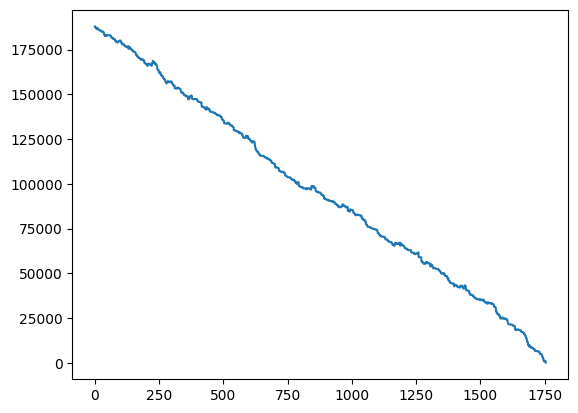

In [13]:
plt.plot(cash_value[1:])

In [14]:
import pandas_datareader as web
tickers = df.TICKER.unique()

In [15]:
 price_data = web.DataReader(tickers, "yahoo", f_date, dt.date.today())['Close']

In [42]:
price_data.head(5)

Symbols,TSLA,APLS,NVDA,AAPL,GM,BIIB,GOOGL
Date,,,,,,,
2018-01-02,21.368668,20.780001,49.837502,43.064999,41.799999,334.170013,53.660500
2018-01-03,21.150000,22.639999,53.117500,43.057499,42.820000,339.850006,54.576000
2018-01-04,20.974667,24.940001,53.397499,43.257500,44.139999,339.989990,54.787998
2018-01-05,21.105333,23.490000,53.849998,43.750000,44.009998,342.489990,55.514500
2018-01-08,22.427334,23.000000,55.500000,43.587502,44.220001,329.649994,55.710499


In [17]:
fund_df = pd.DataFrame()

In [18]:
for n in tickers:
    ticker_holdings = np.zeros(num_days)
    for q in df[df.TICKER == n].iloc:
        day = (q.DATE - f_date).days
        if q.DIRECTION == "BUY":
            ticker_holdings[day] += q.SIZE
        else:
            ticker_holdings[day] -= q.SIZE
    for i in np.arange(1, num_days):
        ticker_holdings[i] = ticker_holdings[i - 1] + ticker_holdings[i]
    c = 0
    for date, price in zip(price_data[n].index, price_data[n]):
        day = (date - f_date).days
        while(c < num_days and c <= day):
            ticker_holdings[c] *= price
            c += 1
    fund_df[n] = ticker_holdings

In [19]:
fund_df

,TSLA,APLS,NVDA,AAPL,GM,BIIB,GOOGL
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-697.586494
1,0.000000,0.000000,0.000000,0.000000,0.000000,2378.950043,-709.488003
2,0.000000,0.000000,0.000000,0.000000,0.000000,2379.929932,-712.243977
3,0.000000,0.000000,269.249992,0.000000,0.000000,2397.429932,-721.688496
4,0.000000,0.000000,277.500000,0.000000,0.000000,2307.549957,-724.236485
...,...,...,...,...,...,...,...
1752,81461.039520,40600.000000,72920.121460,71121.439697,30330.078754,236384.994507,74277.710907
1753,84274.920959,41873.999786,74546.682190,73045.922119,31640.000000,240857.995605,75139.587959
1754,83021.250000,40915.000534,75342.018723,74127.198486,32290.881104,247157.995605,76172.357506
1755,87457.500000,41207.250538,75342.018723,74127.198486,32290.881104,247157.995605,76172.357506


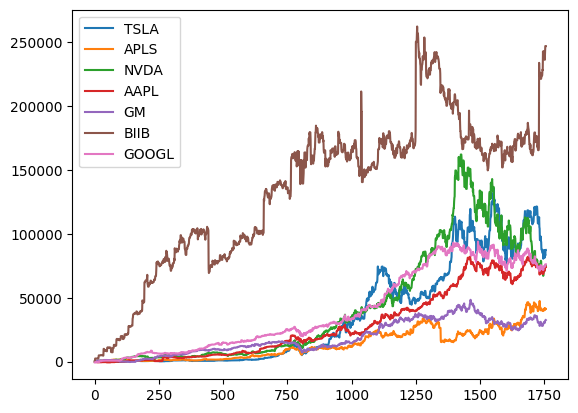

In [20]:
for n in fund_df:
    plt.plot(fund_df[n], label=n)
plt.legend()

In [21]:
fund_value = np.array(cash_value[1:])
cash_value

array([0.0000000e+00, 1.8789521e+05, 1.8748886e+05, ..., 9.6151000e+02,
       9.6151000e+02, 1.8702000e+02])

In [22]:
fund_value

array([1.8789521e+05, 1.8748886e+05, 1.8748886e+05, ..., 9.6151000e+02,
       9.6151000e+02, 1.8702000e+02])

In [23]:
for i, n in enumerate(fund_df):
    fund_value += fund_df[n][1:]

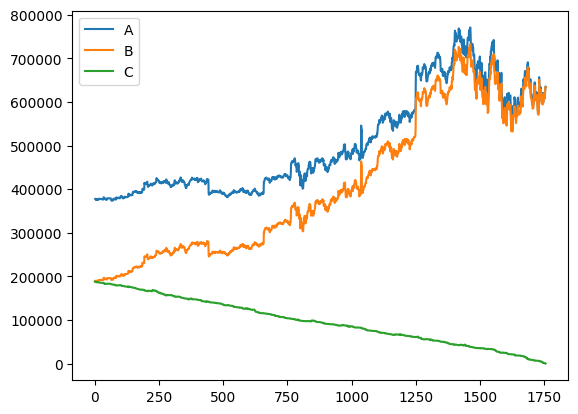

In [46]:
plt.plot(fund_value + cash_value[1:], label="A")
plt.plot(fund_value, label="B")
plt.plot(cash_value[1:], label="C")
plt.legend()